In [1]:
import xarray as xr
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
home_folder = "/nethome/manra003/analysis/dispersion/simulations/"
ds1 = xr.open_zarr(home_folder + "Fwd_2D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr")
ds2 = xr.open_zarr(home_folder + "Fwd_3D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr")  
ds3 = xr.open_zarr(home_folder + "Fwd_DVM_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr")  

In [3]:
# Parallelised code from - Michael Denes
def distance(lon1, lat1, lon2, lat2, r=6378):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """

    #Convert decimal degrees to Radians:
    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    #Implementing Haversine Formula: 
    dlon = np.subtract(lon2, lon1)
    dlat = np.subtract(lat2, lat1)

    a = np.add(np.power(np.sin(np.divide(dlat, 2)), 2),  
                          np.multiply(np.cos(lat1), 
                                      np.multiply(np.cos(lat2), 
                                                  np.power(np.sin(np.divide(dlon, 2)), 2))))
    c = np.multiply(2, np.arcsin(np.sqrt(a)))

    return c*r

In [4]:
t_days = 100
p_total = 13689
sep_array_1_2 = np.empty((p_total, t_days))
sep_array_1_3 = np.empty((p_total, t_days))
sep_array_2_3 = np.empty((p_total, t_days))
sep_array_1_2[:] = np.nan
sep_array_1_3[:] = np.nan
sep_array_2_3[:] = np.nan

<h3> compute absolute distance between particles in different cases

In [5]:
for time_step in range(t_days):
    sep_array_1_2[:, time_step] = distance(ds1['lon'][:, time_step], ds1['lat'][:, time_step], ds2['lon'][:, time_step], ds2['lat'][:, time_step])
    if time_step<60:
        sep_array_1_3[:, time_step] = distance(ds1['lon'][:, time_step], ds1['lat'][:, time_step], ds3['lon'][:, time_step], ds3['lat'][:, time_step])
        sep_array_2_3[:, time_step] = distance(ds2['lon'][:, time_step], ds2['lat'][:, time_step], ds3['lon'][:, time_step], ds3['lat'][:, time_step])

In [6]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [7]:
def get_axes(ax):
    custom_size=10
    gl = ax.gridlines(draw_labels=True)
    gl.xlines = False
    gl.ylines = False
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': custom_size, 'color': 'k'}
    gl.ylabel_style = {'size': custom_size, 'color': 'k'}

    colormap = colors.ListedColormap(['gainsboro', 'white'])

    ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
    ax.set_xlim(3,17)
    ax.set_ylim(-30,-15)
    return ax

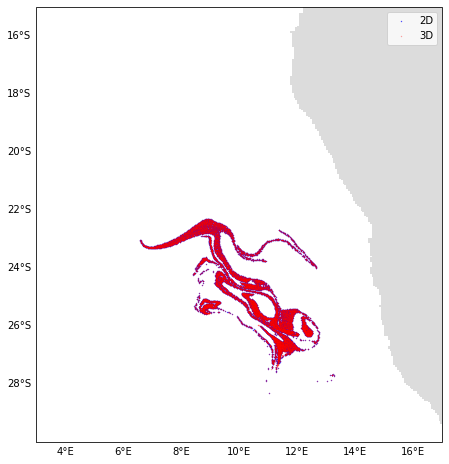

In [8]:
fig= plt.figure(figsize=(16, 8))
time_step= 60

ax = plt.axes(projection=ccrs.PlateCarree())
ax = get_axes(ax)
ax.scatter(ds1['lon'][:, time_step], ds1['lat'][:, time_step], s=0.1, c='blue',label="2D")
ax.scatter(ds2['lon'][:, time_step], ds2['lat'][:, time_step], s=0.1, c='red', label="3D", alpha=0.5)
ax.legend()

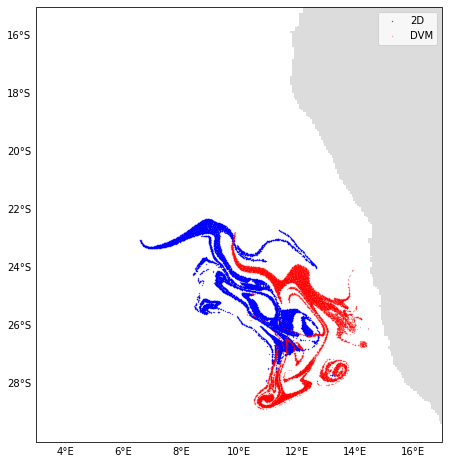

In [9]:
fig= plt.figure(figsize=(16, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax = get_axes(ax)
ax.scatter(ds1['lon'][:, time_step], ds1['lat'][:, time_step], s=0.1, c='blue',label="2D")
ax.scatter(ds3['lon'][:, time_step], ds3['lat'][:, time_step], s=0.1, c='red', label="DVM", alpha=0.5)
ax.legend()

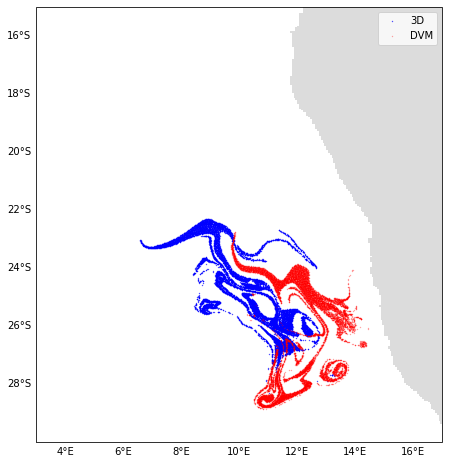

In [10]:
fig= plt.figure(figsize=(16, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax = get_axes(ax)
ax.scatter(ds2['lon'][:, time_step], ds2['lat'][:, time_step], s=0.1, c='blue',label="3D")
ax.scatter(ds3['lon'][:, time_step], ds3['lat'][:, time_step], s=0.1, c='red', label="DVM", alpha=0.5)
ax.legend()

<h3> compute 95 percentile of particles distance for each day

In [11]:
t_step=50
print(min(sep_array_1_2[:,t_step]),max(sep_array_1_2[:,t_step]))
print(min(sep_array_1_3[:,t_step]),max(sep_array_1_3[:,t_step]))
print(min(sep_array_2_3[:,t_step]),max(sep_array_2_3[:,t_step]))

# assert np.equal(sep_array_1_2[:,t_step],sep_array_1_3[:,t_step]).all() 

percentile_95_1_2 = np.percentile(sep_array_1_2, 95, axis=0)
percentile_95_1_3 = np.percentile(sep_array_1_3, 95, axis=0)
percentile_95_2_3 = np.percentile(sep_array_2_3, 95, axis=0)

print(min(percentile_95_1_2),max(percentile_95_1_2))
print(min(percentile_95_1_3),max(percentile_95_1_3))
print(min(percentile_95_2_3),max(percentile_95_2_3))



0.0 108.46766494432372
1.2303139121617037 630.9339578296418
1.2303139121617037 630.9339578296418
0.0 0.0
0.0 548.516822951771
0.0 548.4546548005453


/tmp/ipykernel_16835/2939668688.py:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[0].set_yscale('log')


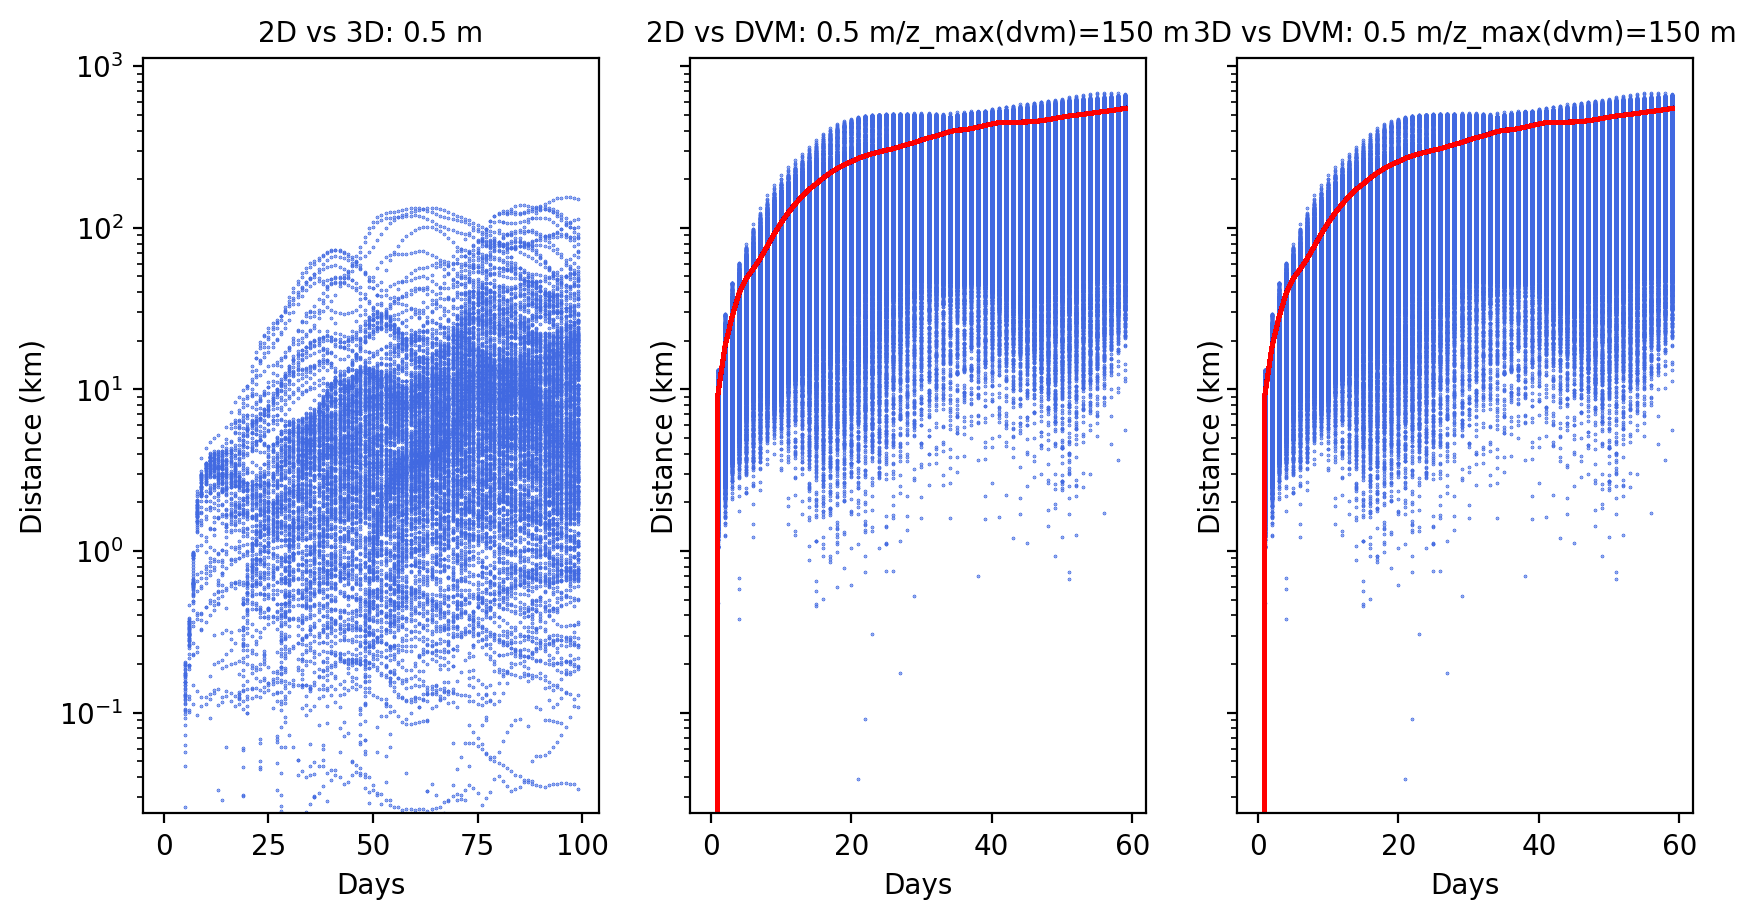

In [12]:
custom_size=10
fig, ax = plt.subplots(ncols=3, nrows=1, dpi=200, figsize=(10, 5), sharey=True)
for i in range(100):
    ax[0].title.set_text('2D vs 3D: 0.5 m')
    ax[0].title.set_fontsize(10)
    ax[0].scatter(np.full((p_total), i), sep_array_1_2[:,i], s=0.1,c='royalblue', zorder=1)
    ax[0].plot(percentile_95_1_2, c='red',zorder=2)
    ax[0].set_ylabel('Distance (km)', fontsize=custom_size)
    ax[0].set_xlabel('Days', fontsize=custom_size)
    ax[0].set_yscale('log')

    ax[1].title.set_text('2D vs DVM: 0.5 m/z_max(dvm)=150 m')
    ax[1].title.set_fontsize(10)
    ax[1].scatter(np.full((p_total), i), sep_array_1_3[:,i], s=0.1,c='royalblue', zorder=1)
    ax[1].plot(percentile_95_1_3, c='red',zorder=2)
    ax[1].set_ylabel('Distance (km)', fontsize=custom_size)
    ax[1].set_xlabel('Days', fontsize=custom_size)
    ax[1].set_yscale('log')

    ax[2].title.set_text('3D vs DVM: 0.5 m/z_max(dvm)=150 m')
    ax[2].title.set_fontsize(10)
    ax[2].scatter(np.full((p_total), i), sep_array_2_3[:,i], s=0.1,c='royalblue', zorder=1)
    ax[2].plot(percentile_95_1_3, c='red',zorder=2)
    ax[2].set_ylabel('Distance (km)', fontsize=custom_size)
    ax[2].set_xlabel('Days', fontsize=custom_size)
    ax[2].set_yscale('log')



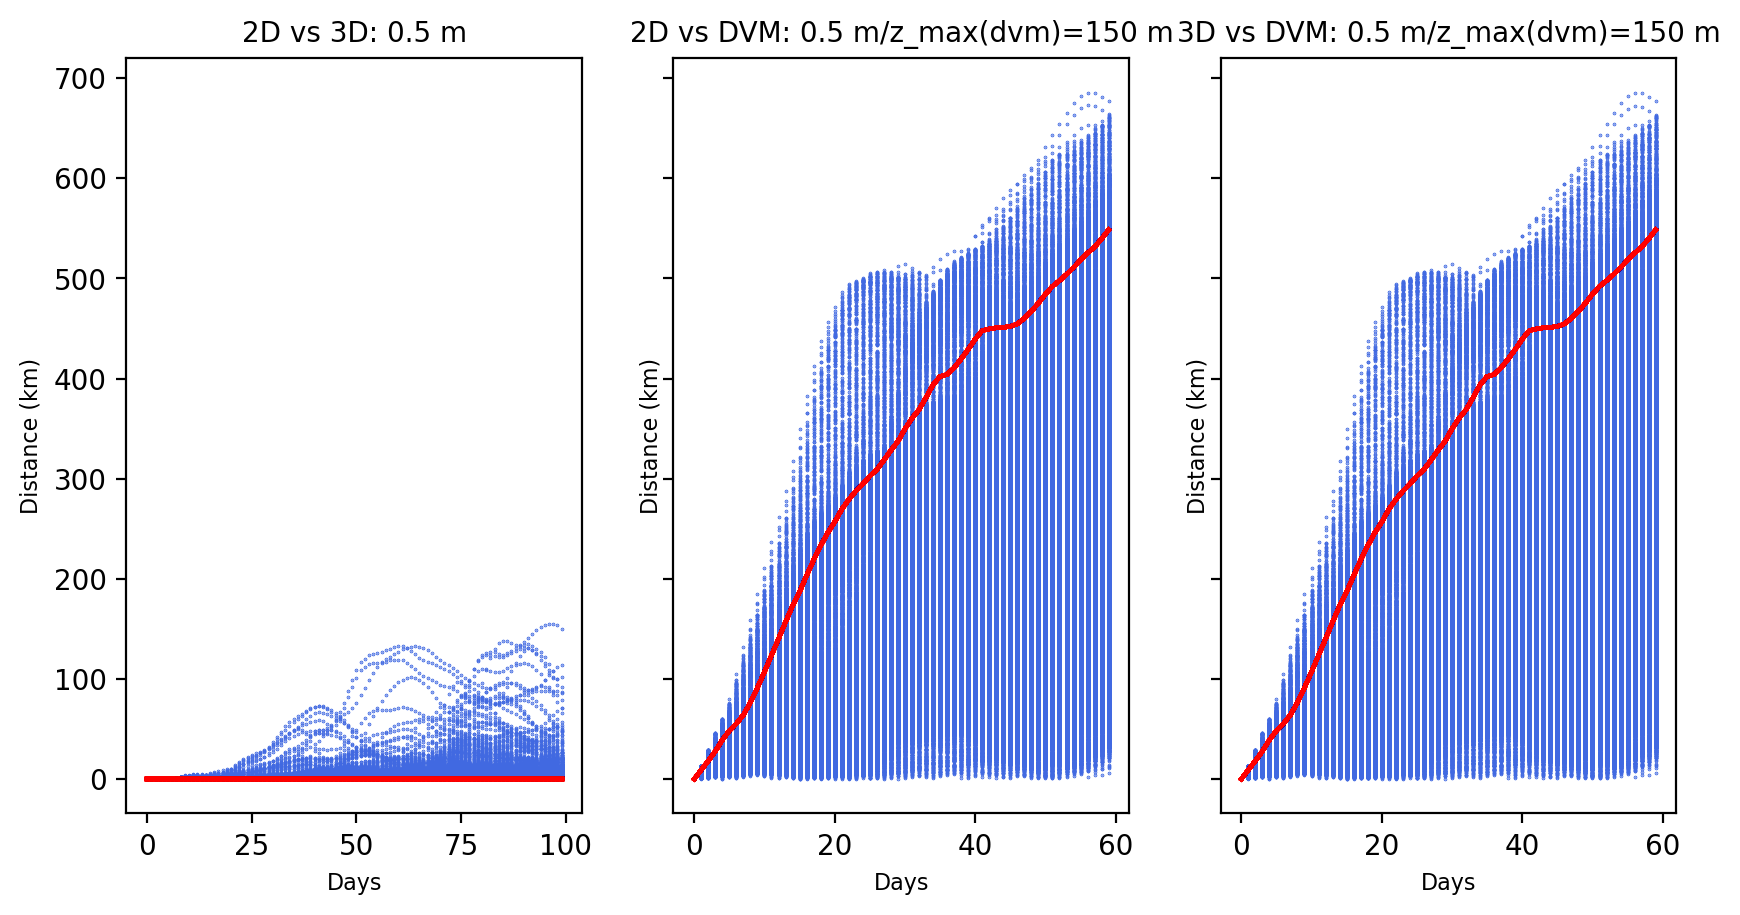

In [13]:
custom_size=8
fig, ax = plt.subplots(ncols=3, nrows=1, dpi=200, figsize=(10, 5), sharey=True)
for i in range(100):
    ax[0].title.set_text('2D vs 3D: 0.5 m')
    ax[0].title.set_fontsize(10)
    ax[0].scatter(np.full((p_total), i), sep_array_1_2[:,i], s=0.1,c='royalblue', zorder=1)
    ax[0].plot(percentile_95_1_2, c='red',zorder=2)
    ax[0].set_ylabel('Distance (km)', fontsize=custom_size)
    ax[0].set_xlabel('Days', fontsize=custom_size)

    ax[1].title.set_text('2D vs DVM: 0.5 m/z_max(dvm)=150 m')
    ax[1].scatter(np.full((p_total), i), sep_array_1_3[:,i], s=0.1,c='royalblue', zorder=1)
    ax[1].plot(percentile_95_1_3, c='red',zorder=2)
    ax[1].set_ylabel('Distance (km)', fontsize=custom_size)
    ax[1].set_xlabel('Days', fontsize=custom_size)
    ax[1].title.set_fontsize(10)

    ax[2].title.set_text('3D vs DVM: 0.5 m/z_max(dvm)=150 m')
    ax[2].scatter(np.full((p_total), i), sep_array_2_3[:,i], s=0.1,c='royalblue', zorder=1)
    ax[2].plot(percentile_95_1_3, c='red',zorder=2)
    ax[2].set_ylabel('Distance (km)', fontsize=custom_size)
    ax[2].set_xlabel('Days', fontsize=custom_size)
    ax[2].title.set_fontsize(10)

<h2> Plot time when particles cross threshold distance of delta-to start with one grid cell.

In [37]:
delta_d = 111 # (approximately one grid cell separation)



days_1_3= np.argmax(sep_array_1_3>delta_d, axis = 1)
min(days_1_3), max(days_1_3)
np.where(days_1_3==0)[0].shape
# sep_array_1_3
# sep_array_2_3

(453,)

In [34]:
sep_array_1_3[1141,58]

105.93024434254298

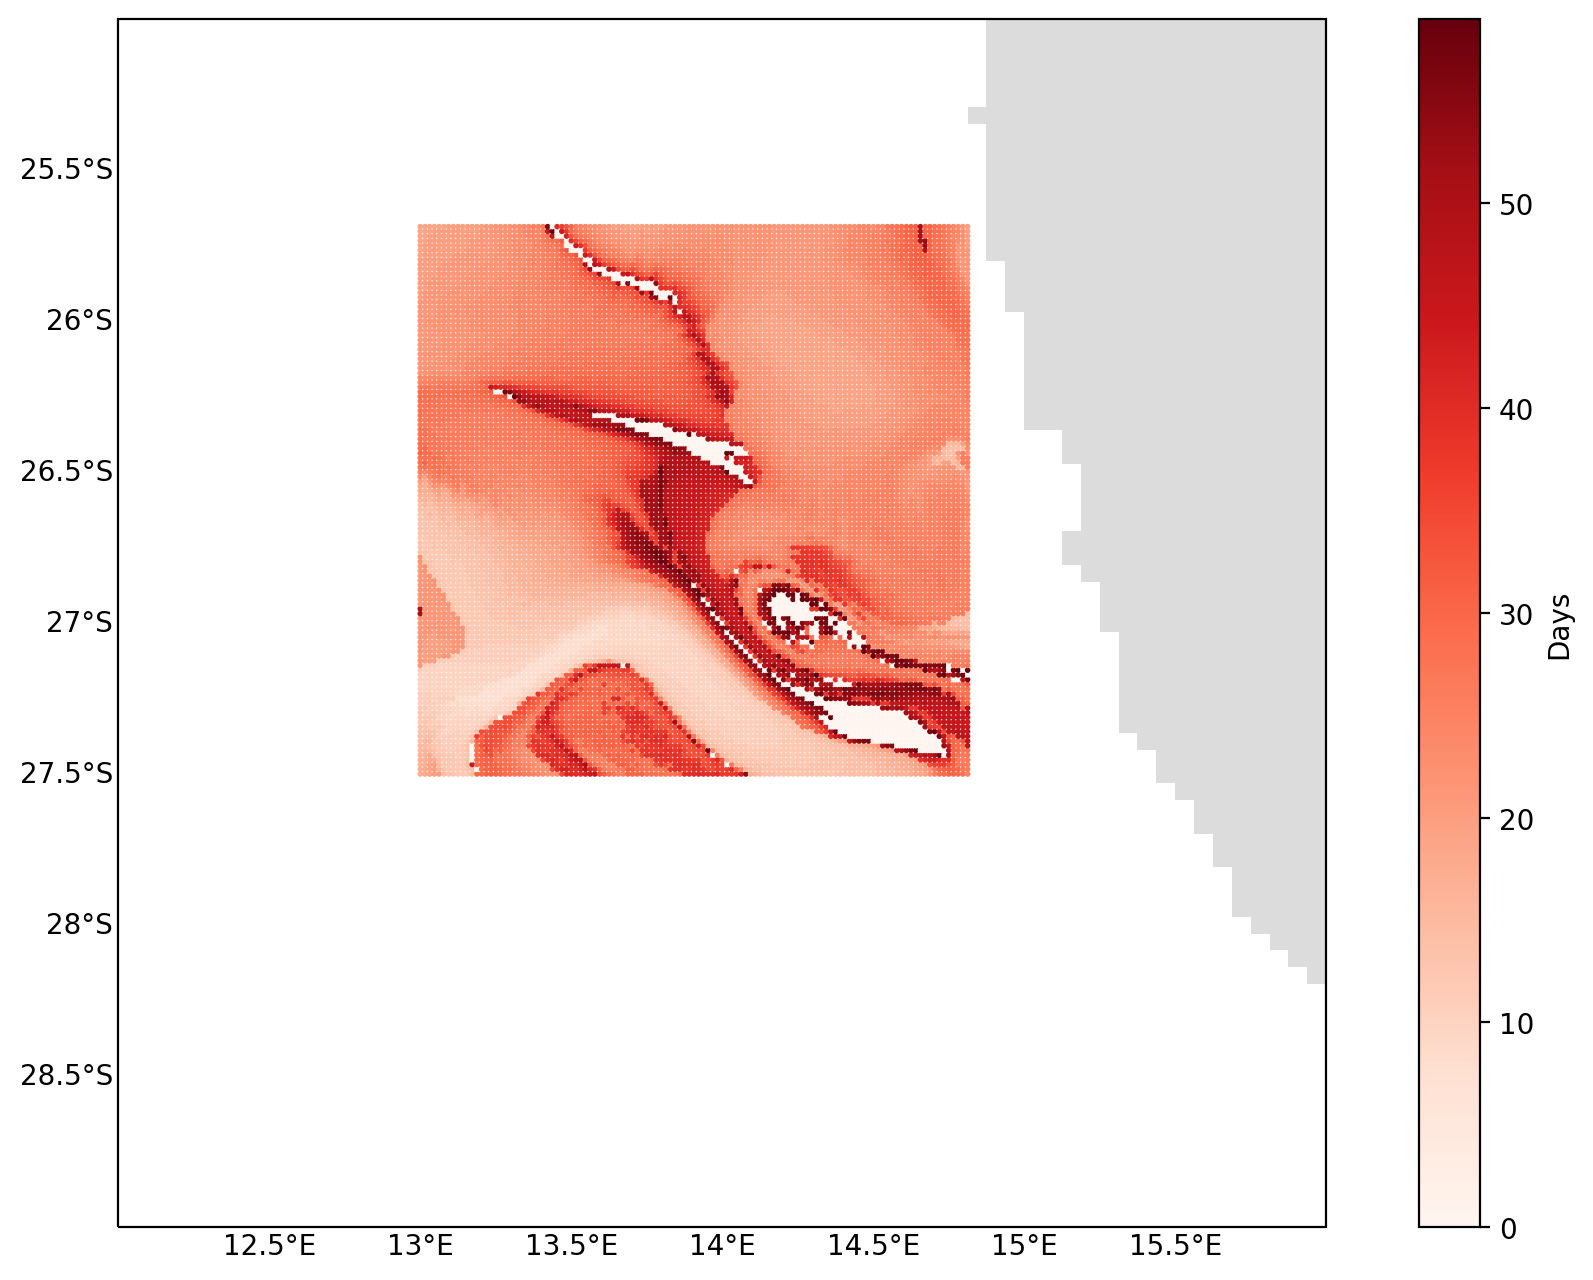

In [45]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
colormap = colors.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
# ax.set_xlim(10, 20)
# ax.set_ylim(-35, -20)
ax.set_xlim(12,16)
ax.set_ylim(-29,-25)
im=ax.scatter(ds1['lon'][:, 0], ds1['lat'][:, 0], c= np.argmax(sep_array_2_3>delta_d, axis = 1), s=1, cmap='Reds')
fig.colorbar(im, ax=ax, label='Days')

plt.show()